In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datasets import load_dataset

c:\Users\Mehra\anaconda3\envs\banking\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_trans = pd.read_csv('transactions_data.csv')

In [18]:
df_trans.info()

<class 'pandas.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 18 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                int64         
 1   date              datetime64[us]
 2   client_id         int64         
 3   card_id           int64         
 4   amount            float64       
 5   use_chip          str           
 6   merchant_id       int64         
 7   merchant_city     str           
 8   merchant_state    str           
 9   zip               object        
 10  mcc               int64         
 11  errors            str           
 12  month             int32         
 13  day_name          str           
 14  hour              int32         
 15  month_name        str           
 16  transaction_type  str           
 17  category          str           
dtypes: datetime64[us](1), float64(1), int32(2), int64(5), object(1), str(8)
memory usage: 2.7+ GB


In [4]:
df_trans['date'] = pd.to_datetime(df_trans['date'])

In [17]:
df_trans.isnull().sum()

id                  0
date                0
client_id           0
card_id             0
amount              0
use_chip            0
merchant_id         0
merchant_city       0
merchant_state      0
zip                 0
mcc                 0
errors              0
month               0
day_name            0
hour                0
month_name          0
transaction_type    0
category            0
dtype: int64

In [6]:
df_trans['date'].min()

Timestamp('2010-01-01 00:01:00')

In [7]:
df_trans['date'].max()

Timestamp('2019-10-31 23:59:00')

In [8]:
df_trans['errors'] =  df_trans['errors'].fillna('None')

df_trans['merchant_state'] = df_trans['merchant_state'].fillna('Online')

df_trans['zip'] = df_trans['zip'].fillna('unknown')

In [9]:
df_trans['amount'] = df_trans['amount'].str.replace('$', '').astype(float)

In [10]:
df_trans['month'] = df_trans['date'].dt.month

df_trans['day_name'] = df_trans['date'].dt.day_name()

df_trans['hour'] = df_trans['date'].dt.hour

df_trans['month_name'] = df_trans['date'].dt.month_name()

In [11]:
df_trans['transaction_type'] = np.where(df_trans['zip'] == 'unknown', 'Online', 'In-Person')

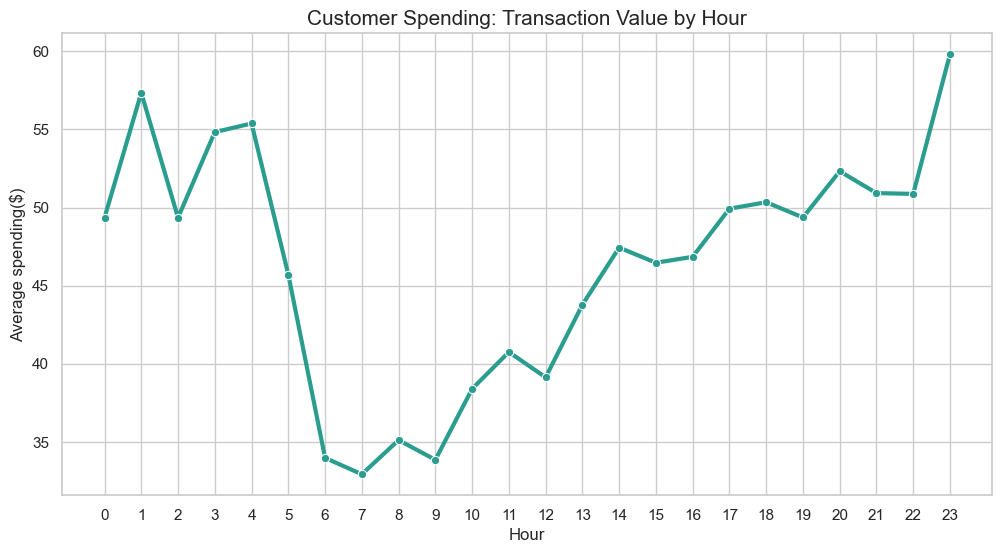

In [12]:
sns.set_theme(style="whitegrid", palette = "viridis")

plt.figure(figsize = (12, 6))

hourly_trend = df_trans.groupby('hour')['amount'].mean()
sns.lineplot(x=hourly_trend.index, y=hourly_trend.values, marker = 'o', linewidth=3, color = '#2a9d8f')

plt.title('Customer Spending: Transaction Value by Hour', fontsize = 15)
plt.xlabel('Hour')
plt.ylabel('Average spending($)')
plt.xticks(range(0,24))
plt.show()

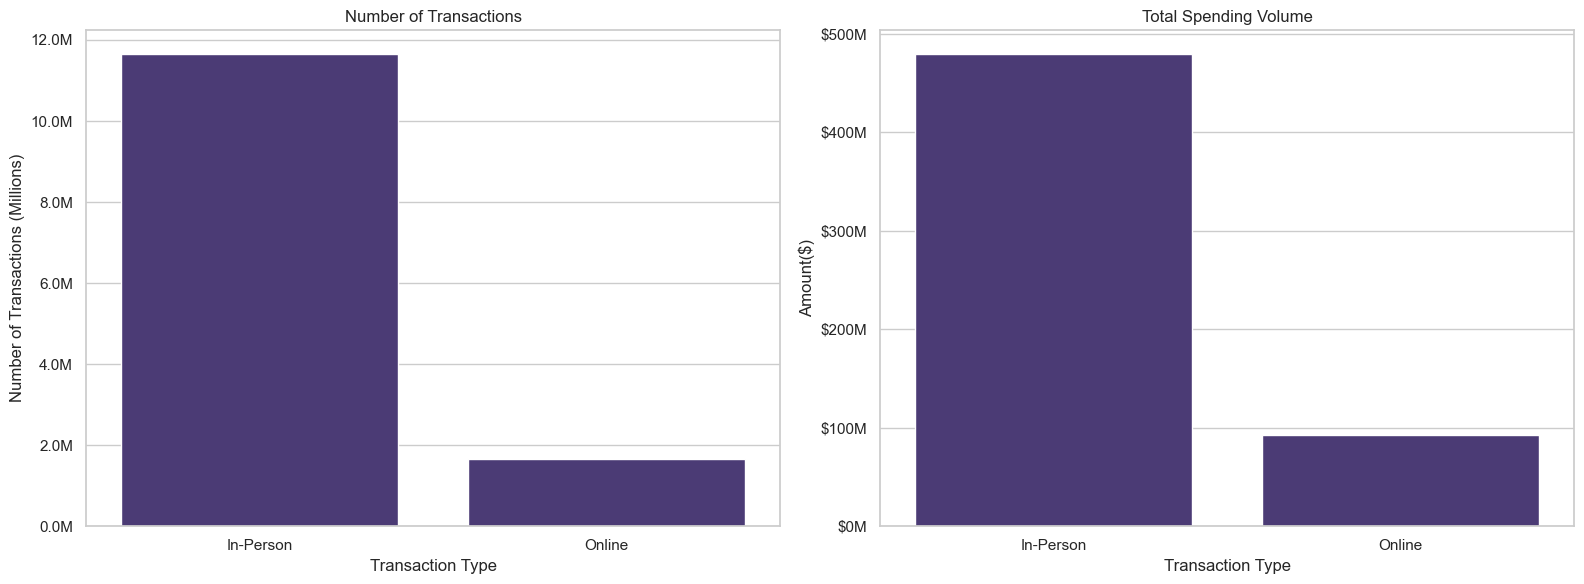

In [13]:
fig, ax = plt.subplots(1,2, figsize =(16,6))

sns.countplot(data=df_trans, x ='transaction_type', ax=ax[0])
ax[0].set_title('Number of Transactions')
ax[0].set_ylabel('Number of Transactions (Millions)')
ax[0].set_xlabel('Transaction Type')


type_volume = df_trans.groupby('transaction_type')['amount'].sum().reset_index()
sns.barplot(data = type_volume, x='transaction_type', y='amount', ax=ax[1])
ax[1].set_title('Total Spending Volume')
ax[1].set_xlabel('Transaction Type')
ax[1].set_ylabel('Amount($)')

ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/1e6:.0f}M'))

ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))


plt.tight_layout()
plt.show()

In [14]:
import json

with open('mcc_codes.json', 'r') as f:
    mcc_json = json.load(f)

mcc_series = pd.Series(mcc_json)

df_trans['category'] = df_trans['mcc'].astype(str).map(mcc_series)

df_trans['category'] = df_trans['category'].fillna('Other')

C:\Users\Mehra\AppData\Local\Temp\ipykernel_45796\2207966468.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(


Text(0.5, 0, 'Number of Transactions(in Millions)')

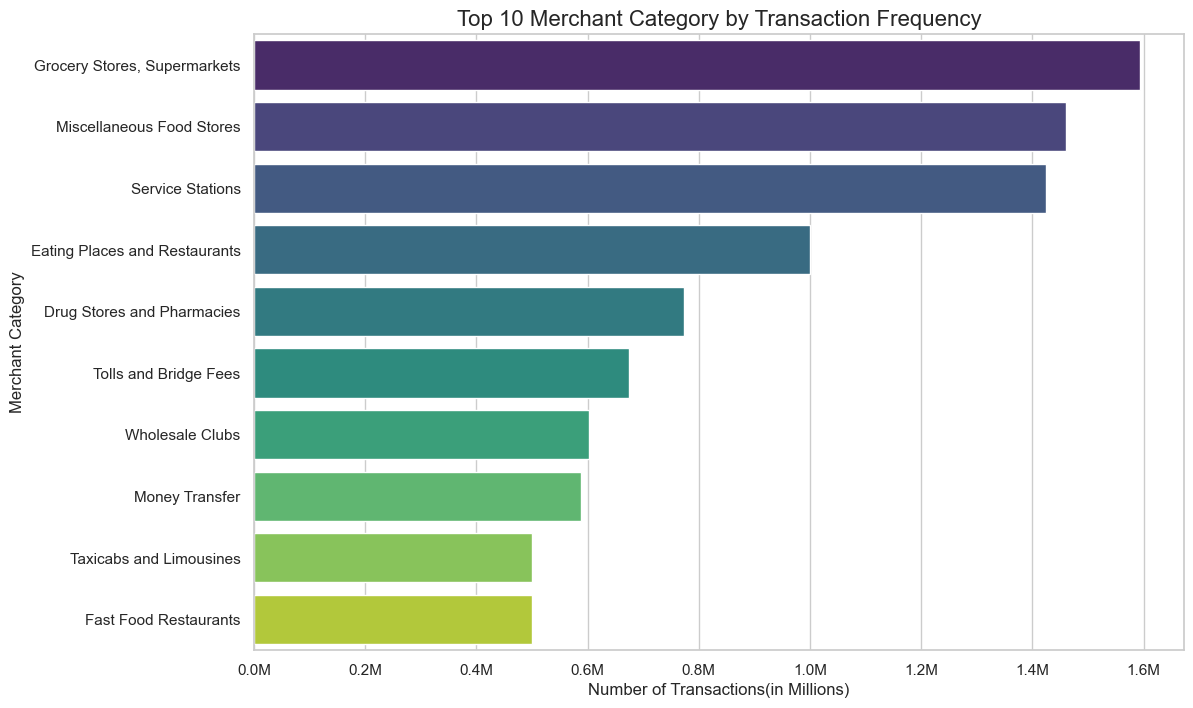

In [ ]:

top_10_cats = df_trans['category'].value_counts().head(10).reset_index()
top_10_cats.columns = ['Category_name', 'Transaction_count']

plt.figure(figsize=(12,8))
sns.set_theme(style='whitegrid')

plot = sns.barplot(
    data = top_10_cats,
    x = 'Transaction_count',
    y = 'Category_name',
    palette = 'viridis'
)

plot.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))

plt.title('Top 10 Merchant Category by Transaction Frequency', fontsize = 16)
plt.ylabel('Merchant Category')
plt.xlabel('Number of Transactions(in Millions)')


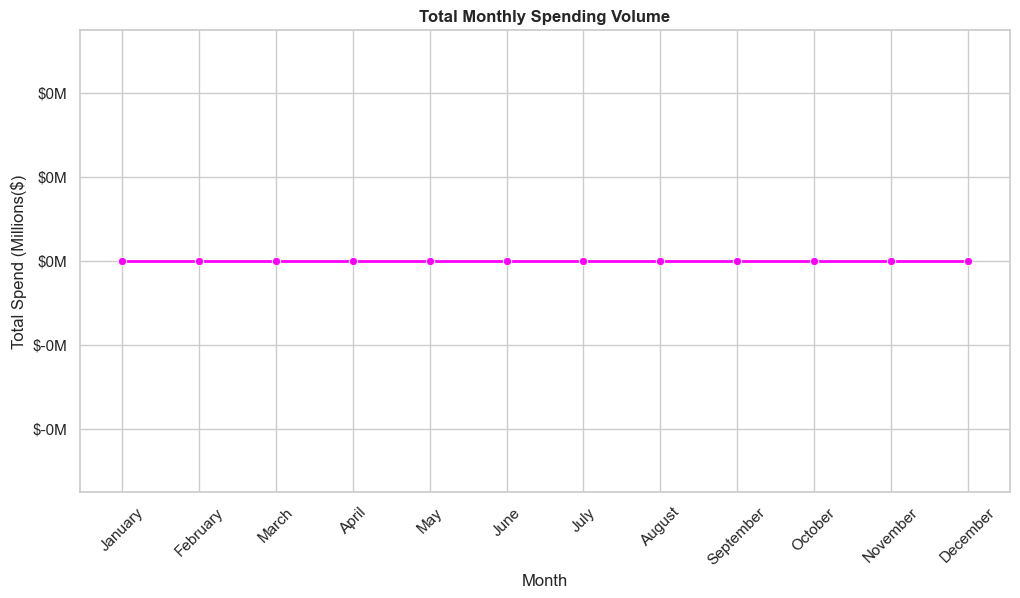

In [30]:
df_trans['month'] = df_trans['month'].astype(str).str.strip().str.capitalize()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_spend = df_trans.groupby('month')['amount'].sum().reindex(month_order).fillna(0).reset_index()


plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_spend, x='month', y='amount', marker = 'o', color='magenta', linewidth=2)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/1e6:.0f}M'))

plt.title('Total Monthly Spending Volume', fontweight = 'bold')
plt.xlabel('Month')
plt.ylabel('Total Spend (Millions($)')
plt.xticks(rotation = 45)
plt.show()
 

In [25]:
print(monthly_spend.head(12))

        month  amount
0     January     NaN
1    February     NaN
2       March     NaN
3       April     NaN
4         May     NaN
5        June     NaN
6        July     NaN
7      August     NaN
8   September     NaN
9     October     NaN
10   November     NaN
11   December     NaN
